In [1]:
## Imports
%matplotlib inline
import pandas as pd
import numpy as np
import math
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
## Read data from source
file = 'data.xlsx'
df = pd.read_excel(file, header=None)
nr_rows = df.shape[0]
nr_cols = df.shape[1]

In [3]:
## Convert Y feature to number
def numberize(value): 
    return 1 if value == 'M' else 0

df[0] = df[0].apply(lambda x: numberize(x))

    
## Normalize data
def norm(vector):
    min = np.amin(vector)
    max = np.amax(vector)
    return (vector - min) / (min - max )

for i in range(nr_cols):
    df[:][i] = norm(df[:][i])    

In [4]:
## Split X and Y
X = df.ix[:,1:]
Y = df.ix[:,0]


In [5]:
## Add '1' - Feature
ones = np.ones(nr_rows, dtype=np.int)
X.insert(0, '', ones)
X.columns = range(df.shape[1])
X.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,-0.521037,-0.022658,-0.545989,-0.363733,-0.593753,-0.792037,-0.703140,-0.731113,-0.686364,...,-0.620776,-0.141525,-0.668310,-0.450698,-0.601136,-0.619292,-0.568610,-0.912027,-0.598462,-0.418864
1,1,-0.643144,-0.272574,-0.615783,-0.501591,-0.289880,-0.181768,-0.203608,-0.348757,-0.379798,...,-0.606901,-0.303571,-0.539818,-0.435214,-0.347553,-0.154563,-0.192971,-0.639175,-0.233590,-0.222878
2,1,-0.601496,-0.390260,-0.595743,-0.449417,-0.514309,-0.431017,-0.462512,-0.635686,-0.509596,...,-0.556386,-0.360075,-0.508442,-0.374508,-0.483590,-0.385375,-0.359744,-0.835052,-0.403706,-0.213433
3,1,-0.210090,-0.360839,-0.233501,-0.102906,-0.811321,-0.811361,-0.565604,-0.522863,-0.776263,...,-0.248310,-0.385928,-0.241347,-0.094008,-0.915472,-0.814012,-0.548642,-0.884880,-1.000000,-0.773711
4,1,-0.629893,-0.156578,-0.630986,-0.489290,-0.430351,-0.347893,-0.463918,-0.518390,-0.378283,...,-0.519744,-0.123934,-0.506948,-0.341575,-0.437364,-0.172415,-0.319489,-0.558419,-0.157500,-0.142595


In [6]:
## Prepare training set and testing datasets

In [7]:
X_train = X.head(300)
Y_train = Y.head(300)

In [8]:
nr_test_rows = nr_rows - 300
X_test = X.tail(nr_test_rows)
Y_test = Y.tail(nr_test_rows)

In [9]:
## Define helper methods

def sig(z):
    return 1 / (1 + math.e ** (-1*z))

def gradient_descent(X, Y, alpha=0.1, max_iterations=100):
    predictions = []
    Theta = np.zeros(X.shape[1], dtype=np.int)  # Starting Theta
    
    while (max_iterations > 0):
        prediction = sig(np.dot(X,Theta))
        Theta = Theta + (alpha * (Y - prediction) * prediction * (1 - prediction)).dot(X)
        predictions.append(prediction)
        max_iterations -= 1
    
    return [predictions, Theta]

# Transform p values to 1's and 0's
crisp_predictor = lambda x: 1 if x >= 0.5 else 0 

def accuracy(crisp, Y): # Subtract predictions from the real values and count the 1's
    difference = pd.Series(crisp - Y)
    correct_predictions = (difference == 0).sum()
    total_predictions = crisp.shape[0]

    return (correct_predictions / total_predictions * 100)

def quality_test(Theta, X, Y):
    predictions = sig(np.dot(X,Theta))
    crisp = pd.Series(predictions).apply(crisp_predictor)
    quality = accuracy(crisp, Y)
    return quality

In [10]:
## Run predictions by iterations of the algorithm
def quality_by_iteration(alpha, max_iterations):
    predictions_by_iteration = gradient_descent(X_train, Y_train, alpha, max_iterations)[0]
    
    
    qualities = []
    for prediction in predictions_by_iteration:
        crisp = pd.Series(prediction).apply(crisp_predictor)
        quality = accuracy(crisp, Y_train)
        qualities.append(quality)

    return qualities    

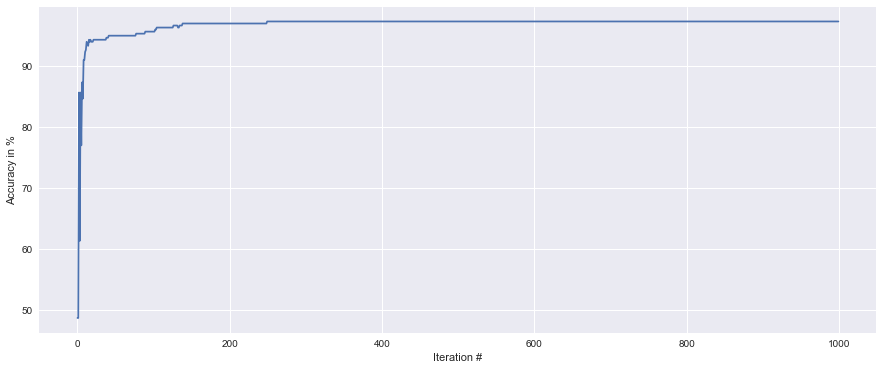

In [11]:
# MAIN 

## Train the algorithm

alpha = 0.03
max_iterations = 1000
qualities = pd.Series(quality_by_iteration(alpha, max_iterations))   

## Plot the graph
sns.set()
plt.figure(figsize=(15, 6))
plt.plot(qualities.index.values, qualities)
plt.ylabel('Accuracy in %')
plt.xlabel('Iteration #')
plt.show()

In [12]:
final_theta = predictions_by_iteration = gradient_descent(X_train, Y_train, alpha, max_iterations)[1]
predictions = sig(np.dot(X_test,final_theta))
crisp = pd.Series(predictions).apply(crisp_predictor)


test_accuracy = accuracy(crisp, Y_test.values)
print(f"The prediction accuracy for the test data is: {'%.2f' % test_accuracy}%.")

The prediction accuracy for the test data is: 97.77%.
